In [72]:
from pyod.models.copod import COPOD
import os
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import numpy as np
import re
import pyod
import torch
import pyod.models.auto_encoder_torch as ae
import pyod.models.cblof as cblof
import pyod.models.knn as knn

# Potentially added at a later point, but need it install SUOD on Conda
# import pyod.models.suod as SUOD

In [73]:
# Define split data

def split_data(file_path, index):
    file_name = os.listdir(file_path)[index]
    test_data_start_pt = int(re.findall(
        r'[0-9]*.txt', file_name)[0].split('.')[0])
    data = pd.read_csv(os.path.join(file_path, os.listdir(file_path)[index]))
    train_data = data[0:test_data_start_pt]
    test_data = data[test_data_start_pt+1:len(data)]

    return train_data, test_data

In [74]:
# define path to data directory
file_path = os.path.join(os.getcwd(), 'KDD-Cup', 'data')
print(file_path)

file_to_load = os.path.join(file_path, os.listdir(file_path)[1])
print(file_to_load)

train, test = split_data(file_path, 1)
train.head()
test.head()

C:\Users\paulr\Google Drive\GitHub\Anomaly-Detection-Project\KDD-Cup\data
C:\Users\paulr\Google Drive\GitHub\Anomaly-Detection-Project\KDD-Cup\data\001_UCR_Anomaly_35000.txt


,-1.4292884e+02
35001,-96.993773
35002,-102.163110
35003,-100.658430
35004,-94.644412
35005,-104.070180


In [75]:
# Not sure if a step here would be needed or beneficial to standardize the predictors

In [76]:
# Implement algorithm #1 (Autoencoding)
# https://pyod.readthedocs.io/en/latest/pyod.models.html#pyod-models-auto-encoder-module

# Define model (TBD hidden neuron details...)
clf = ae.AutoEncoder(epochs = 1)

# Fit model
clf.fit(train)

inner_autoencoder(
  (activation): ReLU()
  (encoder): Sequential(
    (batch_norm0): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (linear0): Linear(in_features=1, out_features=64, bias=True)
    (relu0): ReLU()
    (dropout0): Dropout(p=0.2, inplace=False)
    (batch_norm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (linear1): Linear(in_features=64, out_features=32, bias=True)
    (relu1): ReLU()
    (dropout1): Dropout(p=0.2, inplace=False)
  )
  (decoder): Sequential(
    (batch_norm0): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (linear0): Linear(in_features=32, out_features=64, bias=True)
    (dropout0): Dropout(p=0.2, inplace=False)
    (batch_norm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (linear1): Linear(in_features=64, out_features=1, bias=True)
    (dropout1): Dropout(p=0.2, inplace=False)
  )
)
epoch 0: training

AutoEncoder(batch_norm=True, batch_size=32, contamination=0.1,
      device=device(type='cuda', index=0), dropout_rate=0.2, epochs=1,
      hidden_activation='relu', hidden_neurons=[64, 32],
      learning_rate=0.001, loss_fn=MSELoss(), preprocessing=True,
      weight_decay=1e-05)

In [77]:
# Determine outlier scores for training data
train_outlier_scores = clf.decision_scores_

In [78]:
# Determine outlier scores for test data
test_outlier_scores = clf.decision_function(test)
test_outlier_scores = pd.Series(test_outlier_scores)

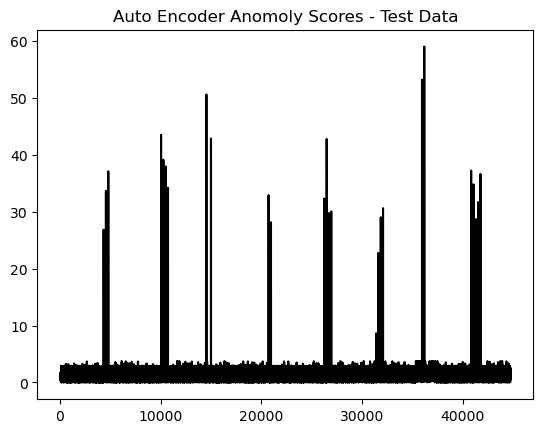

In [79]:
# Plot results
test_outlier_scores.plot(style='k')
plt.title("Auto Encoder Anomoly Scores - Test Data")
plt.show()

In [80]:
# Implement algorithm #2 (CBLOF)
outliers_fraction = 0.000000001

# Define model (TBD hidden neuron details...)
clf = cblof.CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=0)

# Fit model
clf.fit(train)

# Determine outlier scores for training data
train_outlier_scores = clf.decision_scores_

# Determine outlier scores for test data
test_outlier_scores = clf.decision_function(test)
test_outlier_scores = pd.Series(test_outlier_scores)

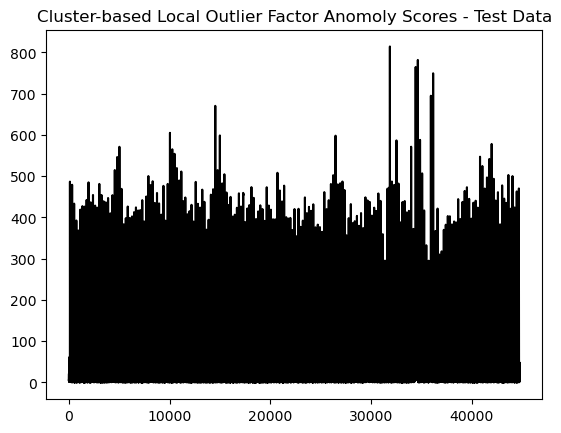

In [81]:
# Plot results
test_outlier_scores.plot(style='k')
plt.title("Cluster-based Local Outlier Factor Anomoly Scores - Test Data")
plt.show()

In [82]:
# Implement algorithm #3 (K-Nearest Neighbors)
outliers_fraction = 0.000000001

# Define model (TBD hidden neuron details...)
clf = knn.KNN(contamination=outliers_fraction)

# Fit model
clf.fit(train)

# Determine outlier scores for training data
train_outlier_scores = clf.decision_scores_

# Determine outlier scores for test data
test_outlier_scores = clf.decision_function(test)
test_outlier_scores = pd.Series(test_outlier_scores)

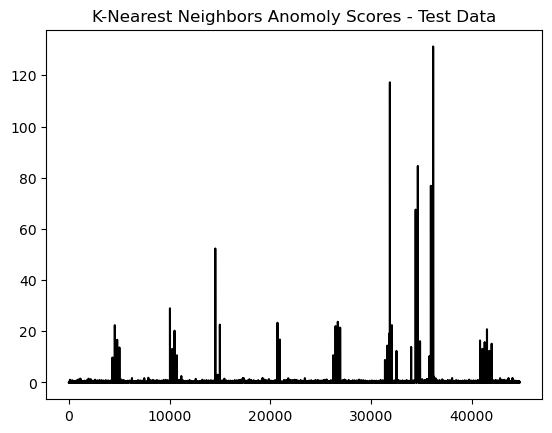

In [83]:
# Plot results
test_outlier_scores.plot(style='k')
plt.title("K-Nearest Neighbors Anomoly Scores - Test Data")
plt.show()

In [84]:
# Implement algorithm #4 (COPOD)

##### COPOD Algorithm
clf = COPOD()
clf.fit(train)

# Fit model
clf.fit(train)

# Determine outlier scores for training data
train_outlier_scores = clf.decision_scores_

# Determine outlier scores for test data
test_outlier_scores = clf.decision_function(test)
test_outlier_scores = pd.Series(test_outlier_scores)

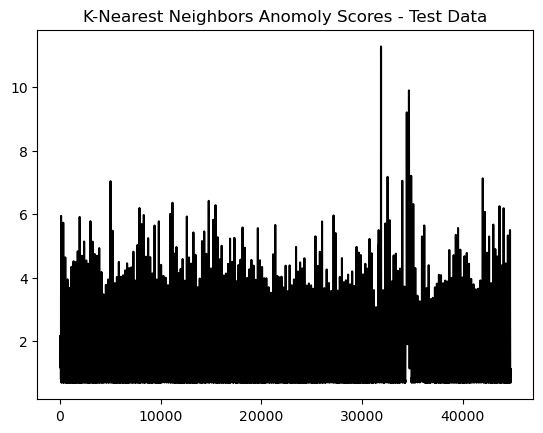

In [85]:
# Plot results
test_outlier_scores.plot(style='k')
plt.title("Copula-Based Outlier Detection Anomoly Scores - Test Data")
plt.show()